In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.io

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


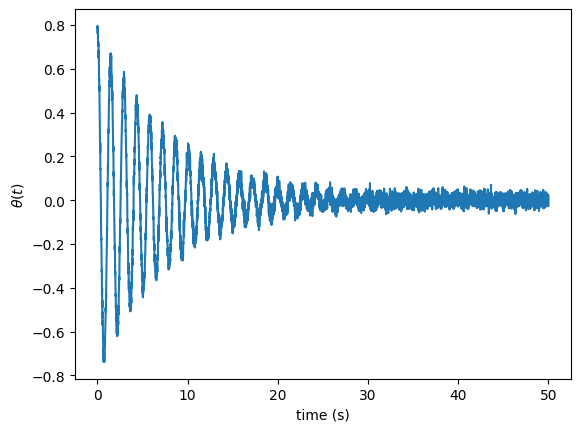

In [ ]:
# Parameters
g = 9.81              # acceleration due to gravity [m/s^2]
l = 0.5               # length of pendulum [m]
m = 0.2               # mass of pendulum [kg]
c = 0.05              # damping coefficient [kg*m^2/s]
theta0 = 45*np.pi/180 # initial angle [radians]
omega0 = 0            # initial angular velocity [radians/s]

# Define initial conditions
init_cond = [theta0, omega0]

# Define differential equation
def f(theta, t):
    return [theta[1], -g/l*np.sin(theta[0])-c/m*theta[1]]

# Solving the differential equation
t_begin = 0
t_end = 50
dt = 0.01
tspan = np.arange(t_begin, t_end+dt, dt)  # time values
theta_actual = odeint(f, init_cond, tspan)[:, 0]  # take only the angles not the angular velocities

# # make dataset
# dataset = [tspan, theta_actual]
# print(dataset)

# Generate random noise with the same shape as theta_actual
noise = np.random.normal(0, 0.02, size=theta_actual.shape)  # Adjust the parameters as desired

# Add the noise to theta_actual
theta_actual_with_noise = theta_actual + noise


theta_actual = theta_actual_with_noise # choose theta_actual or theta_actual_with_noise

# plot theta
plt.plot(tspan, theta_actual)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$')
# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_plot2.png', dpi=300)
plt.show()

In [ ]:
# Features
theta_min4 = np.array(theta_actual[:-5])
theta_min3 = np.array(theta_actual[1:-4])
theta_min2 = np.array(theta_actual[2:-3])
theta_min1 = np.array(theta_actual[3:-2])
theta = np.array(theta_actual[4:-1])

# Label
theta_pred = np.array(theta_actual[5:])

# Set the maximum length of theta
max_length = 100  # Replace with desired maximum length

# Trim theta arrays if they exceed the maximum length
theta_min4 = theta_min4[:max_length]
theta_min3 = theta_min3[:max_length]
theta_min2 = theta_min2[:max_length]
theta_min1 = theta_min1[:max_length]
theta = theta[:max_length]
theta_pred = theta_pred[:max_length]

# features and target
x = np.array([theta_min4, theta_min3, theta_min2, theta_min1, theta])  # Matrix of the features
y = theta_pred  # Matrix of the target

x = np.transpose(x)
y = np.transpose(y)
print(x)
print(y)


[[ 0.78571236  0.77811053  0.78599315  0.77654851  0.79477544]
 [ 0.77811053  0.78599315  0.77654851  0.79477544  0.78954404]
 [ 0.78599315  0.77654851  0.79477544  0.78954404  0.7643185 ]
 [ 0.77654851  0.79477544  0.78954404  0.7643185   0.76615117]
 [ 0.79477544  0.78954404  0.7643185   0.76615117  0.7465494 ]
 [ 0.78954404  0.7643185   0.76615117  0.7465494   0.72594251]
 [ 0.7643185   0.76615117  0.7465494   0.72594251  0.70223274]
 [ 0.76615117  0.7465494   0.72594251  0.70223274  0.69595161]
 [ 0.7465494   0.72594251  0.70223274  0.69595161  0.69461912]
 [ 0.72594251  0.70223274  0.69595161  0.69461912  0.67777998]
 [ 0.70223274  0.69595161  0.69461912  0.67777998  0.66706097]
 [ 0.69595161  0.69461912  0.67777998  0.66706097  0.64265796]
 [ 0.69461912  0.67777998  0.66706097  0.64265796  0.6167143 ]
 [ 0.67777998  0.66706097  0.64265796  0.6167143   0.57219027]
 [ 0.66706097  0.64265796  0.6167143   0.57219027  0.55224441]
 [ 0.64265796  0.6167143   0.57219027  0.55224441  0.53

In [ ]:
from sklearn.model_selection import train_test_split #to split data
from sklearn.preprocessing import StandardScaler #to center & scale data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #split data

scaler = StandardScaler()
x0_train = scaler.fit_transform(x_train)

R-squared LS score: 0.995945
LS coefficients:[-0.21932121  0.05296153  0.14273271  0.11257934  0.39552895]
LS weight: 0.4844813126442847


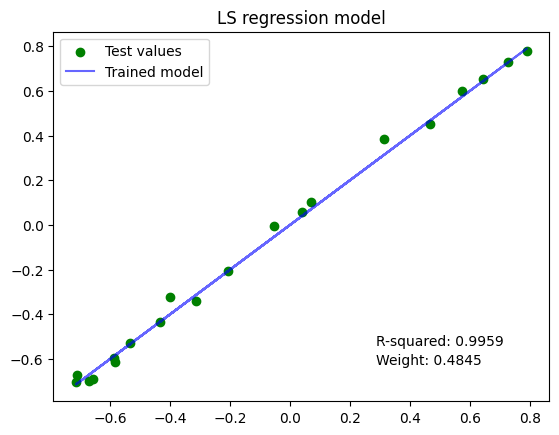

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create and fit the linear regression model
LS_reg = LinearRegression().fit(x0_train, y_train)

# Transform the test features
x0_test = scaler.transform(x_test)

# Calculate the R-squared score
LS_score = LS_reg.score(x0_test, y_test)

# Print the R-squared score
print("R-squared LS score:", round(LS_score, 6))

# Predict using the linear model
y_pred = LS_reg.predict(x0_test)

# linear coefficients
print('LS coefficients:'+str(LS_reg.coef_))
print('LS weight: '+str(sum(LS_reg.coef_)))

# Plot predicted versus actual values
scat = plt.scatter(y_test, y_pred, c='g', label='Test values')
plt.plot(y_test, y_test, c='b', alpha=0.6, label='Trained model')
plt.title('LS regression model')
plt.legend()
plt.annotate(f"R-squared: {round(LS_score, 4)}", xy=(0.65, 0.15), xycoords='axes fraction')
plt.annotate(f"Weight: {round(sum(LS_reg.coef_), 4)}", xy=(0.65, 0.1), xycoords='axes fraction')
# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_LS2.png', dpi=300)
plt.show()

R-squared Lasso score: 0.956077
Lasso coefficients:[0.         0.         0.         0.         0.38569007]
Lasso weight: 0.3856900685242778
Lasso alpha: 0.1


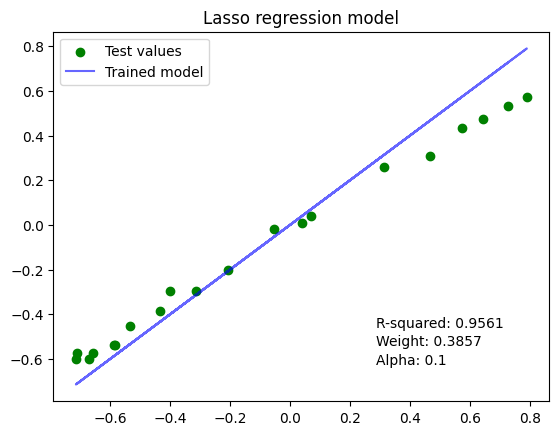

In [ ]:
from sklearn.linear_model import Lasso

# Create and fit the linear regression model
Lasso_reg = Lasso(alpha = 0.1).fit(x0_train, y_train)

# Transform the test features
x0_test = scaler.transform(x_test)

# Calculate the R-squared score
Lasso_score = Lasso_reg.score(x0_test, y_test)

# Print the R-squared score
print("R-squared Lasso score:", round(Lasso_score, 6))

# Predict using the linear model
y_pred = Lasso_reg.predict(x0_test)

# Parameters
print('Lasso coefficients:'+str(Lasso_reg.coef_))
print('Lasso weight: '+str(sum(Lasso_reg.coef_)))
print('Lasso alpha: '+str(Lasso_reg.alpha))

# Plot predicted versus actual values
scat = plt.scatter(y_test, y_pred, c='g', label='Test values')
plt.plot(y_test, y_test, c='b', alpha=0.6, label='Trained model')
plt.title('Lasso regression model')
plt.legend()
plt.annotate(f"R-squared: {round(Lasso_score, 4)}", xy=(0.65, 0.2), xycoords='axes fraction')
plt.annotate(f"Weight: {round(sum(Lasso_reg.coef_), 4)}", xy=(0.65, 0.15), xycoords='axes fraction')
plt.annotate(f"Alpha: {round(Lasso_reg.alpha, 4)}", xy=(0.65, 0.1), xycoords='axes fraction')
# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_Lasso2.png', dpi=300)
plt.show()

R-squared LassoCV score: 0.99578
LassoCV coefficients:[-0.06250399  0.          0.          0.10273049  0.44451831]
LassoCV weight: 0.48474481763743377
LassoCV alpha: 0.0004856900685242782


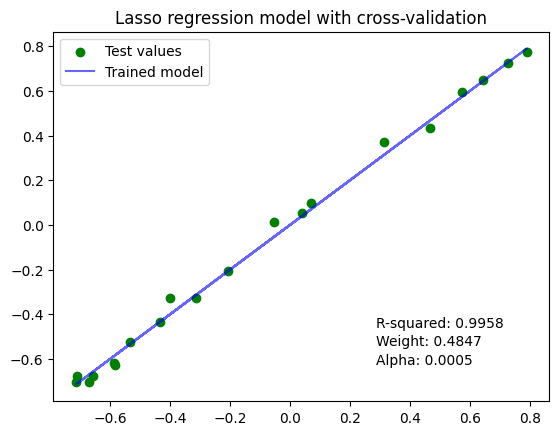

In [ ]:
from sklearn.linear_model import LassoCV

# use 5 folds for cross-validation 
cv=5

# Create and fit the linear regression model
LassoCV_reg = LassoCV(cv=cv, random_state=0).fit(x0_train, y_train)

# Transform the test features
x0_test = scaler.transform(x_test)

# Calculate the R-squared score
LassoCV_score = LassoCV_reg.score(x0_test, y_test)

# Print the R-squared score
print("R-squared LassoCV score:", round(LassoCV_score, 6))

# Predict using the linear model
y_pred = LassoCV_reg.predict(x0_test)

# linear coefficients
print('LassoCV coefficients:'+str(LassoCV_reg.coef_))
print('LassoCV weight: '+str(sum(LassoCV_reg.coef_)))
print('LassoCV alpha: '+str(LassoCV_reg.alpha_))

# Plot predicted versus actual values
scat = plt.scatter(y_test, y_pred, c='g', label='Test values')
plt.plot(y_test, y_test, c='b', alpha=0.6, label='Trained model')
plt.title('Lasso regression model with cross-validation')
plt.legend()
plt.annotate(f"R-squared: {round(LassoCV_score, 4)}", xy=(0.65, 0.2), xycoords='axes fraction')
plt.annotate(f"Weight: {round(sum(LassoCV_reg.coef_), 4)}", xy=(0.65, 0.15), xycoords='axes fraction')
plt.annotate(f"Alpha: {round(LassoCV_reg.alpha_, 4)}", xy=(0.65, 0.1), xycoords='axes fraction')
# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_LassoCV2.png', dpi=300)
plt.show()

R-squared RidgeCV score: 0.995907
RidgeCV coefficients:[-0.16899238  0.02507462  0.12020096  0.15249861  0.35561092]
RidgeCV weight: 0.484392734582808
RidgeCV alpha: 0.1


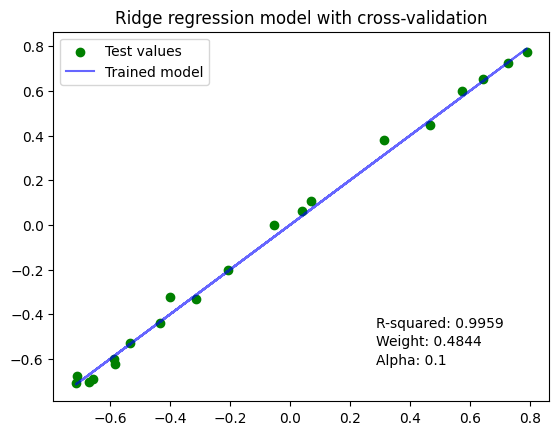

In [ ]:
from sklearn.linear_model import RidgeCV

# use 5 folds for cross-validation 
cv=5
# RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
# Create and fit the linear regression model
RidgeCV_reg = RidgeCV(cv=cv).fit(x0_train, y_train)

# Transform the test features
x0_test = scaler.transform(x_test)

# Calculate the R-squared score
RidgeCV_score = RidgeCV_reg.score(x0_test, y_test)

# Print the R-squared score
print("R-squared RidgeCV score:", round(RidgeCV_score, 6))

# Predict using the linear model
y_pred = RidgeCV_reg.predict(x0_test)

# linear coefficients
print('RidgeCV coefficients:'+str(RidgeCV_reg.coef_))
print('RidgeCV weight: '+str(sum(RidgeCV_reg.coef_)))
print('RidgeCV alpha: '+str(RidgeCV_reg.alpha_))

# Plot predicted versus actual values
scat = plt.scatter(y_test, y_pred, c='g', label='Test values')
plt.plot(y_test, y_test, c='b', alpha=0.6, label='Trained model')
plt.title('Ridge regression model with cross-validation')
plt.legend()
plt.annotate(f"R-squared: {round(RidgeCV_score, 4)}", xy=(0.65, 0.2), xycoords='axes fraction')
plt.annotate(f"Weight: {round(sum(RidgeCV_reg.coef_), 4)}", xy=(0.65, 0.15), xycoords='axes fraction')
plt.annotate(f"Alpha: {round(RidgeCV_reg.alpha_, 4)}", xy=(0.65, 0.1), xycoords='axes fraction')
# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_RidgeCV2.png', dpi=300)
plt.show()

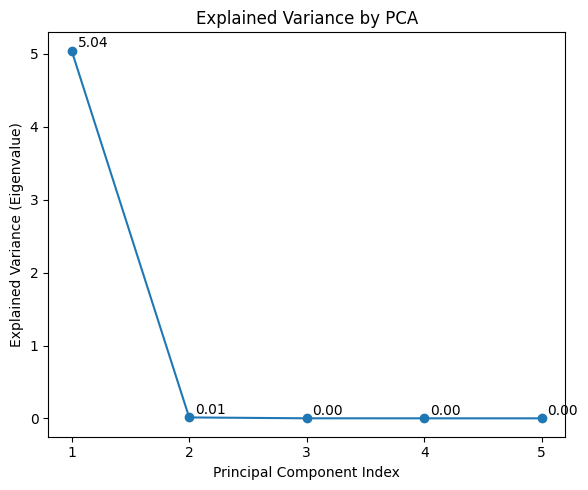

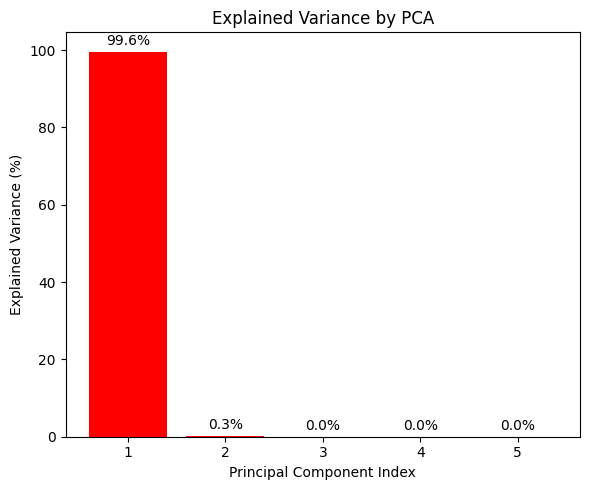

Explained variance ratio: [9.96351536e-01 2.71890398e-03 3.61109013e-04 3.09836432e-04
 2.58614610e-04]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA() 
pca.fit(x0_train)

# Plot with original explained variance values
fig, ax1 = plt.subplots(figsize=(6, 5))
ax1.plot(np.arange(1, x0_train.shape[1] + 1), pca.explained_variance_, marker='o', linestyle='-', markersize=6)
ax1.set_title('Explained Variance by PCA')
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('Explained Variance (Eigenvalue)')

# Add labels for explained variance values
for i, var in enumerate(pca.explained_variance_):
    ax1.text(i + 1.05, var + 0.01, f'{var:.2f}', ha='left', va='bottom')

# Customize plot layout
plt.xticks(np.arange(1, x0_train.shape[1] + 1))
plt.tight_layout()

# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_PCA_Line2.png', dpi=300)

# Display the plot
plt.show()

# Plot with explained variance percentage as bar plot
fig, ax2 = plt.subplots(figsize=(6, 5))
explained_var_percentage = pca.explained_variance_ratio_ * 100
ax2.bar(np.arange(1, x0_train.shape[1] + 1), explained_var_percentage, color='red')
ax2.set_title('Explained Variance by PCA')
ax2.set_xlabel('Principal Component Index')
ax2.set_ylabel('Explained Variance (%)')

# Add labels for explained variance percentage
for i, var in enumerate(explained_var_percentage):
    ax2.text(i + 1, var + 1, f'{var:.1f}%', ha='center', va='bottom', color='black')

# Customize plot layout
plt.xticks(np.arange(1, x0_train.shape[1] + 1))
plt.tight_layout()

# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_PCA_Bar2.png', dpi=300)

# Display the plot
plt.show()

print("Explained variance ratio: "+str(pca.explained_variance_ratio_))

R-squared PC score: 0.988832
PC coefficients: [0.2166827]
PC weight: 0.21668270294883463


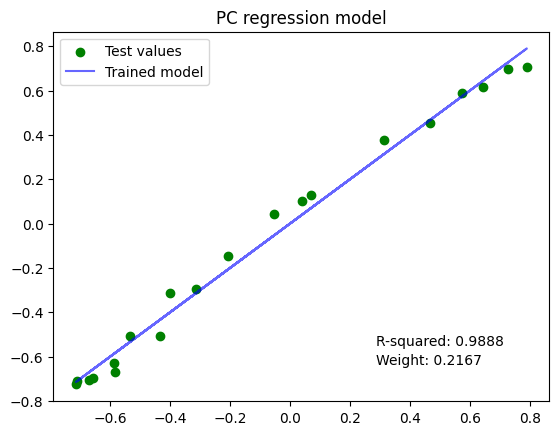

In [ ]:
# Truncate PC's
n = 1
A = pca.components_.T
z_train = x0_train @ A 
z_train = z_train[:,:n]
z_test = x0_test @ A
z_test = z_test[:,:n]

# PC regression
PC_reg = LinearRegression().fit(z_train, y_train)

# Calculate the R-squared score
PC_score = PC_reg.score(z_test, y_test)

# Print the R-squared score
print("R-squared PC score:", round(PC_score, 6))

# Predict using the linear model
y_pred = PC_reg.predict(z_test)

# Parameters
print('PC coefficients: '+str(PC_reg.coef_))
print('PC weight: '+str(sum(PC_reg.coef_)))

# Plot predicted versus actual values
scat = plt.scatter(y_test, y_pred, c='g', label='Test values')
plt.plot(y_test, y_test, c='b', alpha=0.6, label='Trained model')
plt.title('PC regression model')
plt.legend()
plt.annotate(f"R-squared: {round(PC_score, 4)}", xy=(0.65, 0.15), xycoords='axes fraction')
plt.annotate(f"Weight: {round(sum(PC_reg.coef_), 4)}", xy=(0.65, 0.1), xycoords='axes fraction')
# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Regression_PC2.png', dpi=300)
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


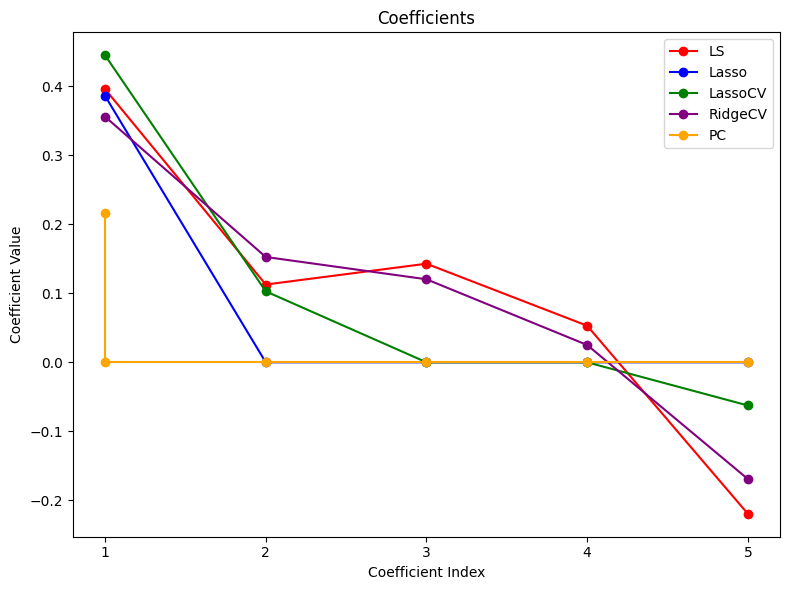

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the coefficients as line plots with different colors
ax.plot(np.arange(1, len(LS_reg.coef_) + 1), np.flip(LS_reg.coef_), marker='o', linestyle='-', color='red', label='LS')
ax.plot(np.arange(1, len(Lasso_reg.coef_) + 1), np.flip(Lasso_reg.coef_), marker='o', linestyle='-', color='blue', label='Lasso')
ax.plot(np.arange(1, len(LassoCV_reg.coef_) + 1), np.flip(LassoCV_reg.coef_), marker='o', linestyle='-', color='green', label='LassoCV')
ax.plot(np.arange(1, len(RidgeCV_reg.coef_) + 1), np.flip(RidgeCV_reg.coef_), marker='o', linestyle='-', color='purple', label='RidgeCV')
ax.plot([1, 1, 2, 3, 4, 5], [PC_reg.coef_, 0, 0, 0, 0, 0], marker='o', linestyle='-', color='orange', label='PC')

# Set the title and labels
ax.set_title('Coefficients')
ax.set_xlabel('Coefficient Index')
ax.set_ylabel('Coefficient Value')

# Customize plot layout
plt.xticks(np.arange(1, max(len(LS_reg.coef_), len(Lasso_reg.coef_), len(LassoCV_reg.coef_), len(RidgeCV_reg.coef_), len(PC_reg.coef_)) + 1))
plt.tight_layout()

# Add a legend
ax.legend()

# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Coefficient_Values_Line2.png', dpi=300)

# Display the plot
plt.show()